In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pathlib import Path

***DATA CLEANING***


In [2]:
# Load the data

DATA_DIR = Path("..") / "data"

airbnb_data = pd.read_csv(DATA_DIR / "airbnb_data.csv")

In [3]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             755 non-null    object 
 1   Type             756 non-null    object 
 2   Price per night  749 non-null    float64
 3   Host             756 non-null    object 
 4   Rating           623 non-null    object 
 5   Reviews          531 non-null    float64
 6   City             756 non-null    object 
dtypes: float64(2), object(5)
memory usage: 41.5+ KB


In [4]:
airbnb_data.head()

,Name,Type,Price per night,Host,Rating,Reviews,City
0,Acogedor apartamento privado en el centro de B...,"Alojamiento entero: piso en Bern, Suiza",43.0,Anfitrión: Marcos,"4,68",19.0,bern
1,Exclusivo departamento urbano,"Alojamiento entero: piso en Bern, Suiza",473.0,Anfitrión: Stephan,NaN,NaN,bern
2,Sala de estar en Berna,"Habitación en Bern, Suiza",36.0,Quédate con Arwen,"5,0",5.0,bern
3,Apartamento en el casco antiguo,"Alojamiento entero: piso en Bern, Suiza",125.0,Anfitrión: Kai,"4,84",339.0,bern
4,Habitación en Freimettigen,"Habitación en Freimettigen, Suiza",36.0,Anfitrión: Urs,NaN,NaN,bern


In [5]:
# Define a function to format the category column


def category(value):
    if "Alojamiento entero" in value:
        return "Alojamiento entero"
    elif "Habitación" in value:
        return "Habitación"
    else:
        return "otro"

In [6]:
# Creamos la columna Country en funcion a "Type"
airbnb_data["Country"] = airbnb_data["Type"].str.split(",").str[-1].str.strip()

# agregar columna "categoria" en funcion a Type
airbnb_data["Type"] = airbnb_data["Type"].apply(category)
airbnb_data.rename(columns={"Type": "Category"}, inplace=True)

In [7]:
airbnb_data.head(10)

,Name,Category,Price per night,Host,Rating,Reviews,City,Country
0,Acogedor apartamento privado en el centro de B...,Alojamiento entero,43.0,Anfitrión: Marcos,"4,68",19.0,bern,Suiza
1,Exclusivo departamento urbano,Alojamiento entero,473.0,Anfitrión: Stephan,NaN,NaN,bern,Suiza
2,Sala de estar en Berna,Habitación,36.0,Quédate con Arwen,"5,0",5.0,bern,Suiza
3,Apartamento en el casco antiguo,Alojamiento entero,125.0,Anfitrión: Kai,"4,84",339.0,bern,Suiza
4,Habitación en Freimettigen,Habitación,36.0,Anfitrión: Urs,NaN,NaN,bern,Suiza
5,"Ice Attic-Apt, casco antiguo, a 3 minutos de l...",Habitación,113.0,Anfitrión: Kai,"4,84",218.0,bern,Suiza
6,N.º 2 apartamento acogedor y céntrico,Alojamiento entero,71.0,Anfitrión: Bess,"4,87",NaN,bern,Suiza
7,"Habitación en el espejo BE, a 10 de Berna",Alojamiento entero,62.0,Anfitrión: Chantal,"5,0",13.0,bern,Suiza
8,"Habitación soleada, súper central, estación de...",Habitación,68.0,Quédate con Kai,"4,93",877.0,bern,Suiza
9,Como si estuvieras en casa,Habitación,42.0,Quédate con Aline Karina,NaN,NaN,bern,Suiza


In [8]:
# Limpiamos los nombres de "Host"
airbnb_data["Host"] = (
    airbnb_data["Host"].str.replace("Anfitrión:", "").str.replace("Quédate con ", "")
)

# reemplazamos las comas por puntos en Rating
airbnb_data["Rating"] = airbnb_data["Rating"].str.replace(",", ".").astype(float)

# asignamos 0 a los casos que no tienen ni Rating ni Reviews.
airbnb_data["Rating"] = airbnb_data["Rating"].fillna(0).astype(float)
airbnb_data["Reviews"] = airbnb_data["Reviews"].fillna(0)


# .capitalize() para la columna City
airbnb_data["City"] = airbnb_data["City"].str.capitalize()

In [9]:
airbnb_data.columns = airbnb_data.columns.str.lower().str.replace(" ", "_")

In [10]:
airbnb_data.head(10)

,name,category,price_per_night,host,rating,reviews,city,country
0,Acogedor apartamento privado en el centro de B...,Alojamiento entero,43.0,Marcos,4.68,19.0,Bern,Suiza
1,Exclusivo departamento urbano,Alojamiento entero,473.0,Stephan,0.00,0.0,Bern,Suiza
2,Sala de estar en Berna,Habitación,36.0,Arwen,5.00,5.0,Bern,Suiza
3,Apartamento en el casco antiguo,Alojamiento entero,125.0,Kai,4.84,339.0,Bern,Suiza
4,Habitación en Freimettigen,Habitación,36.0,Urs,0.00,0.0,Bern,Suiza
5,"Ice Attic-Apt, casco antiguo, a 3 minutos de l...",Habitación,113.0,Kai,4.84,218.0,Bern,Suiza
6,N.º 2 apartamento acogedor y céntrico,Alojamiento entero,71.0,Bess,4.87,0.0,Bern,Suiza
7,"Habitación en el espejo BE, a 10 de Berna",Alojamiento entero,62.0,Chantal,5.00,13.0,Bern,Suiza
8,"Habitación soleada, súper central, estación de...",Habitación,68.0,Kai,4.93,877.0,Bern,Suiza
9,Como si estuvieras en casa,Habitación,42.0,Aline Karina,0.00,0.0,Bern,Suiza


In [11]:
# Guardamos en un nuevo csv
airbnb_data.to_csv(DATA_DIR / "airbnb_limpio.csv", sep=";", index=False)

***VISUALIZATIONS***

In [12]:
px.scatter(
    x=airbnb_data["rating"],
    y=airbnb_data["price_per_night"],
    color=airbnb_data["category"],
    title="Price and rating distribution by accomodation type",
    labels={"x": "Rating", "y": "Price per night"},
)

In [13]:
px.scatter(
    data_frame=airbnb_data,
    x="rating",
    y="price_per_night",
    log_x=True,
    color="category",
    title="Price and rating distribution by accomodation type (logarithmic scale)",
    labels={"x": "Rating (log scale)", "y": "Price per night"},
)

In [14]:
px.scatter(
    data_frame=airbnb_data,
    x="rating",
    y="reviews",
    log_x=True,
    color="category",
    title="Reviews and rating distribution by accomodation type (logarithmic scale)",
    labels={"x": "Rating", "y": "Reviews"},
)

In [15]:
px.histogram(
    airbnb_data,
    x="price_per_night",
    color="city",
    title="Pricing distribution by city",
    labels={"price_per_night": "Price per night"},
    nbins=100,
)

In [16]:
px.histogram(
    airbnb_data,
    x="price_per_night",
    log_x=True,
    color="city",
    title="Pricing distribution by city (logarithmic scale)",
    labels={"price_per_night": "Price per night"},
    nbins=100,
)

In [17]:
px.scatter(
    data_frame=airbnb_data,
    x="price_per_night",
    y="reviews",
    hover_data=["city", "rating", "category"],
    color="city",
)

*Number of accommodations per city*

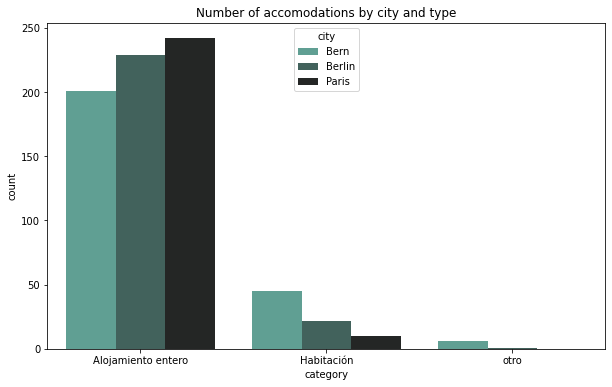

In [18]:
fig = plt.figure(figsize=(10, 6))

sns.countplot(x="category", hue="city", data=airbnb_data, palette="dark:#5A9_r")

plt.title("Number of accomodations by city and type")
plt.show()

*Median Price Per Night Grouped by Country*

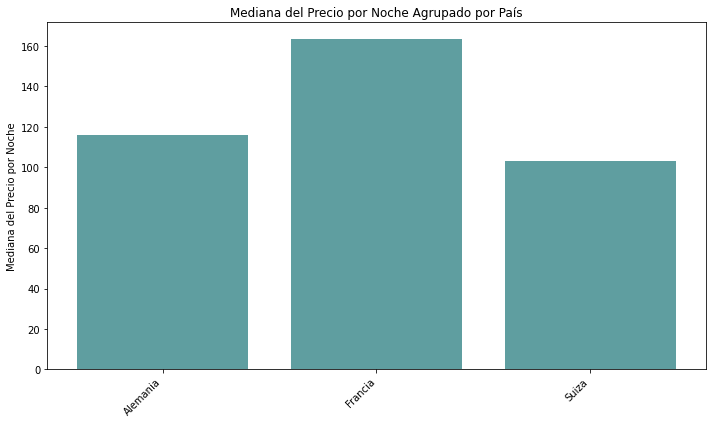

In [19]:
median_prices = airbnb_data.groupby("country")["price_per_night"].median().reset_index()

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(median_prices["country"], median_prices["price_per_night"], color="cadetblue")

# Etiquetas
plt.ylabel("Mediana del Precio por Noche")
plt.title("Mediana del Precio por Noche Agrupado por País")
plt.xticks(rotation=45, ha="right")


plt.tight_layout()
plt.show()